# Heart Disease Prediction


---

## Loading Dataset

In [174]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy,math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [175]:
#Loading Dataset
db = pd.read_csv('heart.csv')

---

## Dataset Description

In [176]:
print("Dataset Shape:", db.shape)
print("\nFirst few rows:")
print(db.head())

Dataset Shape: (1025, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [177]:
print("\nDataset Info:")
print(db.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Problem Type: Binary Classification

---

## EDA

In [178]:
print("\nTarget Variable Distribution:")
print(db['target'].value_counts())


Target Variable Distribution:
target
1    526
0    499
Name: count, dtype: int64


In [179]:
##Statistical Summary
print("\nStatistical Summary:")
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    print(f"\nColumn Name: {col}")
    print(f"Mean: {db[col].mean().__round__(2)}")
    print(f"Median: {db[col].median()}")
    print(f"Mode: {db[col].mode()[0]}")
    print(f"Standard Deviation: {db[col].std()}")


Statistical Summary:

Column Name: age
Mean: 54.43
Median: 56.0
Mode: 58
Standard Deviation: 9.072290233244281

Column Name: trestbps
Mean: 131.61
Median: 130.0
Mode: 120
Standard Deviation: 17.516718005376408

Column Name: chol
Mean: 246.0
Median: 240.0
Mode: 204
Standard Deviation: 51.59251020618206

Column Name: thalach
Mean: 149.11
Median: 152.0
Mode: 162
Standard Deviation: 23.005723745977196

Column Name: oldpeak
Mean: 1.07
Median: 0.8
Mode: 0.0
Standard Deviation: 1.175053255150173


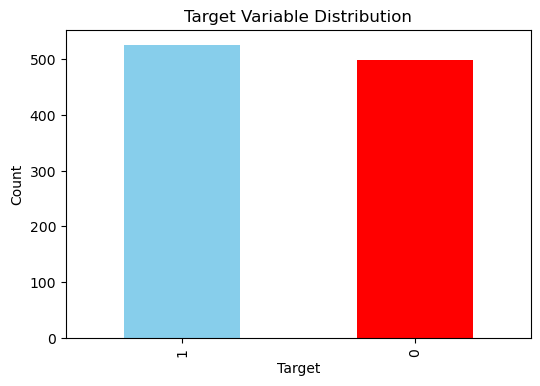

In [180]:
## Data Visualization
#Target distribution
plt.figure(figsize=(6,4))
db['target'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

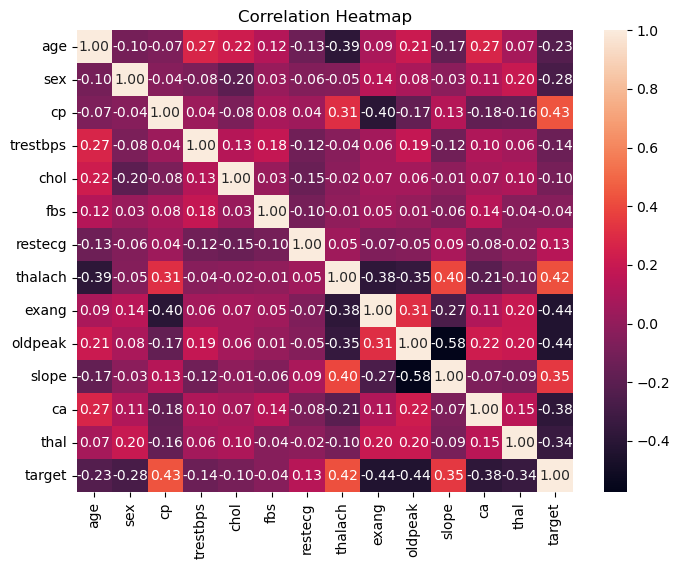

In [181]:
#Feature relationship (correlation heatmap or 2-feature scatter)
plt.figure(figsize=(8,6))
sns.heatmap(db.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


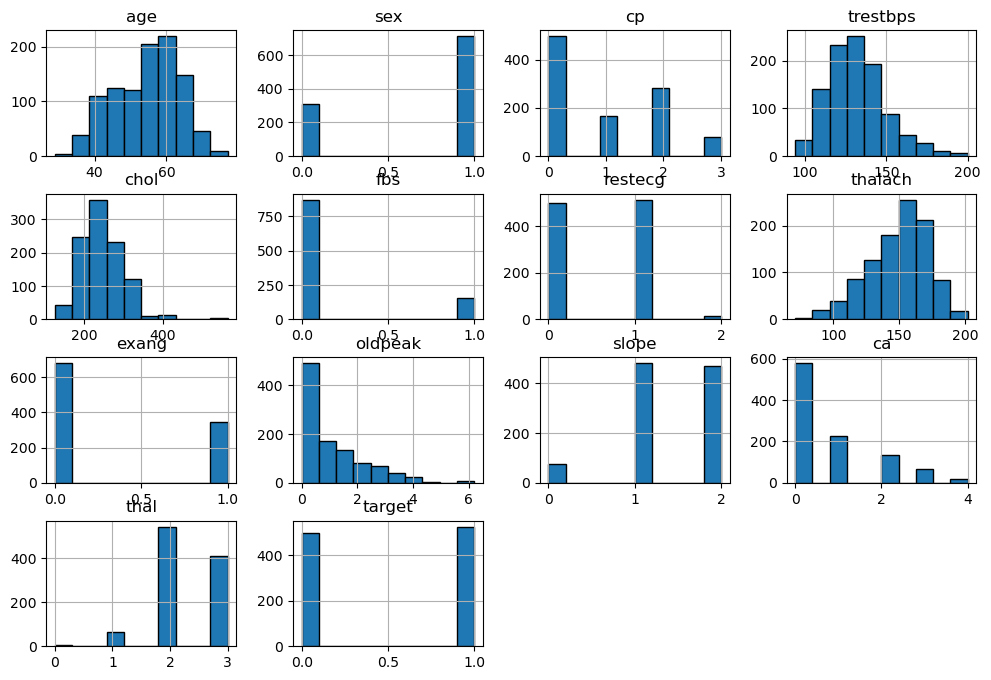

In [182]:
#Outlier check (boxplot or histogram)
db.hist(figsize=(12,8), edgecolor='black')
plt.show()

### Findings

● **What the target distribution indicates (skew, imbalance, spread)**

Target Distribution indicates low class imbalance as both bars in histogram are of similar height.

● **Any strong feature relationships or lack thereof**

*Relationships With target*:
Features like cp(0.43),thalach(0.42),slope(0.35),restecg(0.13) have the highest positive correlation with target.
Features like exang(-0.44),oldpeak(-0.44),ca(-0.38),thal(-0.34) have highest negative correlation with target.

*Notable relationships among features*:
oldpeak vs slope: −0.58
cp vs exang: −0.40
age vs thalach: −0.39
thalach vs exang: −0.38
thalach vs oldpeak: −0.35

● **Presence of outliers or scale differences and their possible impact**

Outliers are present in chol,trestbps,oldpeak

Scale indifference in features like chol(100-600), trestbps(100-200), thalach(~80-200).

Impact: Outliers may distort distributions or large range features might dominate. Hence, scaling is necessary.

---

## Data Preprocessing


In [183]:
# Missing Value Handling
print("\nMissing Values:")
print(db.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [184]:
#Splitting Dataset
def train_test_split(db, test_size=0.2, random_state=15):
    testset_size=int(len(db)*test_size)
    train_set,test_set=np.split(db.sample(frac=1, random_state=random_state), [len(db)-testset_size])
    return train_set, test_set

In [185]:
def divide_features_labels(db):
    X = db[db.columns[:-1]].values
    y=db[db.columns[-1]].values
    return X, y

In [186]:
train_set, test_set = train_test_split(db, test_size=0.2, random_state=30)

In [187]:
#Feature Scaling-Standardization:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    mean = train_set[col].mean()
    std = train_set[col].std()
    train_set[col] = (train_set[col] - mean) / std
    test_set[col] = (test_set[col] - mean) / std

In [188]:
x_train,y_train=divide_features_labels(train_set)
x_test,y_test=divide_features_labels(test_set)

**Why chosen imputation and encoding methods suit this dataset**

Since the dataset contains no missing values, imputation was not applied to avoid unnecessary distortion of feature distributions. Categorical columns are already numerically encoded, so no extra encoding was required. 

**Whether scaling changes feature dominance**

Standardization prevents large-scale features like chol, trestbps from dominating the gradient updates, improving convergence and allowing the model to better learn based on the data.

**One concrete data-leakage risk in this dataset and how it was avoided**

A concrete leakage risk is feature scaling using mean and std computed from the full dataset, which leads to test data affecting training data. This was avoided by computing mean & std only on the training split and applying the same transformation to the test split.

---

## Logistic Regression: Supervised Learning Model

In [189]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X,w,b):
    z=np.dot(X,w)+b
    g=sigmoid(z)
    return g

In [190]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.
    for i in range(m):
        f_i=predict(X[i],w,b)
        cost+=-(y[i]*(np.log(f_i)))-((1-y[i])*(np.log(1-f_i)))
    cost=cost/m
    return cost

In [191]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range (m):
        f_i = predict(X[i],w,b)
        err_i=f_i-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err_i*X[i,j]
        dj_db=dj_db+err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw,dj_db

In [192]:
def fit(X, y, w_in, b_in, alpha, iters):
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(iters):
        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {compute_cost(X,y,w,b)}")
        
    return w,b

In [193]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
iters = 10000
alpha = 0.1

w_out,b_out=fit(x_train,y_train,w_tmp,b_tmp,alpha,iters)
print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6701845149049952
Iteration 1000: Cost 0.3556014258365302
Iteration 2000: Cost 0.35342025792671505
Iteration 3000: Cost 0.35265360172798543
Iteration 4000: Cost 0.3523097752227609
Iteration 5000: Cost 0.3521494813305454
Iteration 6000: Cost 0.3520739897161305
Iteration 7000: Cost 0.3520382795227203
Iteration 8000: Cost 0.3520213429942947
Iteration 9000: Cost 0.35201329620846544

Updated parameters: w:[-0.01576231 -1.70645574  0.96015386 -0.26373386 -0.24688254 -0.29093887
  0.48592859  0.53703226 -0.82401369 -0.60741001  0.6973904  -0.7818574
 -0.80730271], b:1.7387042033801539


In [194]:
##Evaluation
def evaluate_model(X, y, w, b, threshold=0.5):
    m = X.shape[0]
    correct = 0
    for i in range(m):
        f_i = predict(X[i], w, b)
        prediction = 1 if f_i >= threshold else 0
        if prediction == y[i]:
            correct += 1
    accuracy = correct / m
    return accuracy

train_accuracy = evaluate_model(x_train, y_train, w_out, b_out)
test_accuracy = evaluate_model(x_test, y_test, w_out, b_out)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 86.10%
Testing Accuracy: 84.88%


In [195]:
##Equivalent SKLearn Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
sklearn_train_accuracy = model.score(x_train, y_train)
sklearn_test_accuracy = model.score(x_test, y_test)
print(f"\nSKLearn Training Accuracy: {sklearn_train_accuracy * 100:.2f}%")
print(f"SKLearn Testing Accuracy: {sklearn_test_accuracy * 100:.2f}%")


SKLearn Training Accuracy: 85.61%
SKLearn Testing Accuracy: 84.88%


**Effect of algorithm assumptions on results**

Assumption 1: Features combine linearly in form w.x+b \
Accuracy of ~85% shows that linear decision boundary is sufficient

Assumption 2: Multicollinearity may destabilize weights \
Features having strong correlation on heatmap (oldpeak vs slope) can affect coefficient stability

**Sensitivity to parameters (e.g., k, learning rate)**

The model is sensitive to learning rate alpha; Too high alpha causes divergence, while too low alpha slows training. With alpha=10000 and 10,000 iterations the cost decreases smoothly, indicating stable convergence. Final accuracy can also depend on classification threshold(default 0.5).

**Where and why errors occur (at least one concrete example)**

A failure occurs when predicted probability is exactly 0 or 1, which causes log(0) in `compute_cost` and causing NaN cost.

---

## K-Means Clustering: Unsupervised Model


In [196]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [197]:
def find_nearest_centroid(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        dist=[]
        for j in range(K):
            a=np.linalg.norm(X[i]-centroids[j])
            dist.append(a)
        idx[i]=np.argmin(dist)
    return idx

In [198]:
def compute_centroids(X,idx,K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        points=X[idx==i]
        centroids[i]=np.mean(points,axis=0)
    return centroids

In [199]:
def run_kMeans(X,centroids,iter):
    K=centroids.shape[0]
    for i in range(iter):
        idx=find_nearest_centroid(X,centroids)
        centroids=compute_centroids(X,idx,K)
        if i%10==0:
            print(f"Iteration {i} Completed\n")
    return centroids,idx

In [200]:
def predict_kmeans(X,centroids):
    dist=[]
    for j in range(centroids.shape[0]):
        a=np.linalg.norm(X-centroids[j],axis=1)
        dist.append(a)
    dist=np.array(dist)
    idx=np.argmin(dist,axis=0)
    return idx

In [201]:
K = 2
max_iters = 100

initial_centroids = kMeans_init_centroids(x_train, K)

centroids, idx = run_kMeans(x_train, initial_centroids, max_iters)

Iteration 0 Completed

Iteration 10 Completed

Iteration 20 Completed

Iteration 30 Completed

Iteration 40 Completed

Iteration 50 Completed

Iteration 60 Completed

Iteration 70 Completed

Iteration 80 Completed

Iteration 90 Completed



In [202]:
def evaluate_kMeans(X,y,centroids):
    idx=predict_kmeans(X,centroids)
    m=X.shape[0]
    correct=0
    for i in range(m):
        if idx[i]==y[i]:
            correct+=1
    accuracy=correct/m
    return accuracy

In [203]:
kMeans_train_accuracy=evaluate_kMeans(x_train,y_train,centroids)
kMeans_test_accuracy=evaluate_kMeans(x_test,y_test,centroids)

print(f"\nK-Means Training Accuracy: {kMeans_train_accuracy * 100:.2f}%")
print(f"K-Means Testing Accuracy: {kMeans_test_accuracy * 100:.2f}%")


K-Means Training Accuracy: 77.93%
K-Means Testing Accuracy: 78.54%


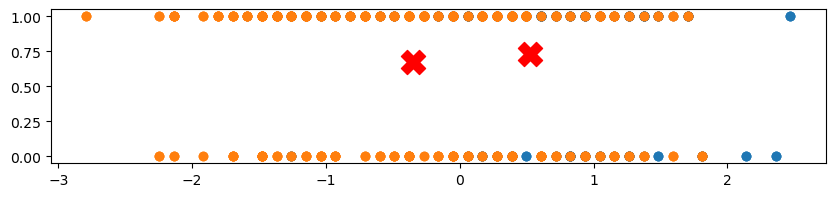

In [205]:
#Visualization
plt.figure(figsize=(10,2))
for k in range(K):
    cluster_points=x_train[predict_kmeans(x_train,centroids)==k]
    plt.scatter(cluster_points[:,0],cluster_points[:,1],label=f'Cluster {k}')
plt.scatter(centroids[:,0],centroids[:,1],s=300,c='red',marker='X',label='Centroids')
plt.show()